# Importing the Library


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

# Loading the data

In [2]:
data=pd.read_csv(r'F:\SOMETHING\Iris (1).csv',header = 0)
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Plotting the data

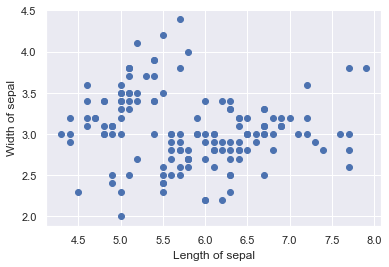

In [3]:
plt.scatter(data['SepalLengthCm'],data['SepalWidthCm'])

plt.xlabel('Length of sepal')
plt.ylabel('Width of sepal')
plt.show()

In [4]:
data.drop(['Id'],inplace=True,axis=1)
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# Encoding the target value

In [5]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data['Species']= le.fit_transform(data['Species']) 
data['Species'].unique() 

array([0, 1, 2])

In [12]:
data.head()
data.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [14]:
x=data.iloc[:,:-1]
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [19]:
y = data['Species']
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

# Training the model

In [20]:
kmeans = KMeans(3)
kmeans.fit(x,y)

KMeans(n_clusters=3)

In [24]:
cluster = data.copy()

cluster['cluster_pred']=kmeans.fit_predict(x)
cluster


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster_pred
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,1
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


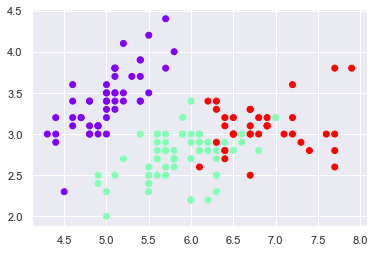

In [25]:
plt.scatter(cluster['SepalLengthCm'], cluster['SepalWidthCm'], c= cluster ['cluster_pred'], cmap = 'rainbow')
plt.show()

In [26]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)
x_scaled

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

# Elbow method

In [27]:
wcss = []
cl_num = 10
for i in range (1,cl_num):
    kmeans= KMeans(i)
    kmeans.fit(x_scaled)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
wcss

[600.0000000000003,
 223.73200573676343,
 140.96581663074699,
 114.42714544645858,
 91.1543680779766,
 80.24972235577128,
 70.9587590382698,
 63.633260309130314,
 55.07270614819221]

Text(0, 0.5, 'sum of squares')

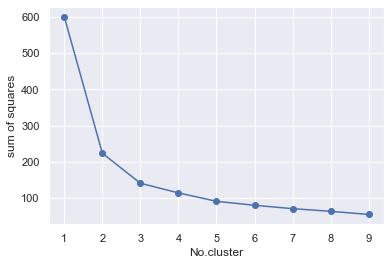

In [29]:
number_cluster = range(1,cl_num)
plt.plot(number_cluster, wcss, marker='o')
plt.xlabel('No.cluster')
plt.ylabel('sum of squares')

In [30]:
kmeans_3 = KMeans(3)
kmeans_3.fit(x_scaled)

KMeans(n_clusters=3)

In [31]:
cluster_3 = x.copy()
cluster_3['cluster_pred']=kmeans_3.fit_predict(x_scaled)

# Cluster after finding Optium no. of cluster

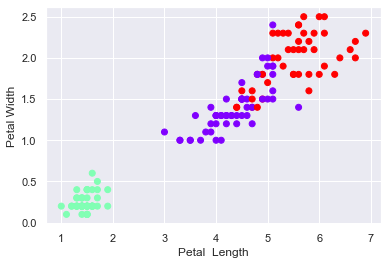

In [32]:
plt.scatter(cluster_3['PetalLengthCm'], cluster_3['PetalWidthCm'], c= cluster_3['cluster_pred'], cmap = 'rainbow')
plt.xlabel('Petal  Length')
plt.ylabel('Petal Width')
plt.show()

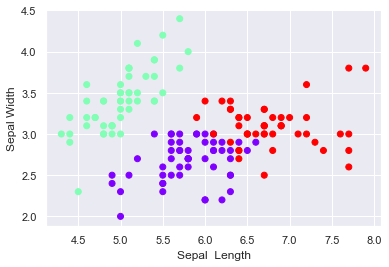

In [33]:
plt.scatter(cluster_3['SepalLengthCm'], cluster_3['SepalWidthCm'], c= cluster_3['cluster_pred'], cmap = 'rainbow')
plt.xlabel('Sepal  Length')
plt.ylabel('Sepal Width')
plt.show()


# Cluster of real data

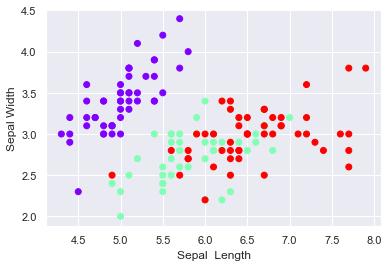

In [34]:
plt.scatter(data['SepalLengthCm'], data['SepalWidthCm'], c= data['Species'], cmap = 'rainbow')
plt.xlabel('Sepal  Length')
plt.ylabel('Sepal Width')
plt.show()


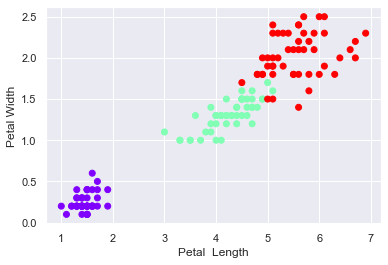

In [35]:
plt.scatter(data['PetalLengthCm'], data['PetalWidthCm'], c= data['Species'], cmap = 'rainbow')
plt.xlabel('Petal  Length')
plt.ylabel('Petal Width')
plt.show()